In [1]:
# For Google Colab
# Install folium package.
!pip install folium

In [2]:
# For Google Colab
# Mount your Google drive and copy all files from "AI_HW2" directory
# in your Google drive to current directory.
from google.colab import drive
drive.mount('/content/gdrive')
#!cp -r ./gdrive/MyDrive/AI_HW2/* .
%cd /content/gdrive/MyDrive/三下/AI/HW2

Mounted at /content/gdrive
/content/gdrive/MyDrive/三下/AI/HW2


In [3]:
# Don't change this part.
# For load graph information and show map
import folium
import pickle
def load_path_graph(path):
    with open('graph.pkl', 'rb') as f:
        graph = pickle.load(f)

    node_pairs = list(zip(path[:-1], path[1:]))
    lines = []
    for edge in graph:
        if (edge['u'], edge['v']) in node_pairs or  (edge['v'], edge['u']) in node_pairs:
            lines.append(edge['geometry'])
    return lines

In [4]:
# Part 1~4 and 6
# You can write your code in this file directly.
# Or you can wirte in new .py files and import it.
# ex: from astar import astar

## My implementation : Graph Class with BFS/DFS/UCS/A* function and read csv

In [5]:
from collections import defaultdict
from queue import PriorityQueue

class Node:
  def __init__(self, parent = None, id = None, dist = 0.0, speed = 0.0):
    self.parent = parent
    self.id = id
    self.dist = dist
    self.speed= speed

class Graph:
  def __init__(self):
    self.graph = defaultdict(list)
    self.heur = defaultdict(list)
    
  def addEdge(self,v1,v2,d,speed):
	  self.graph[v1].append(Node(v1,v2,d,speed))
  
  def addheur(self,v,h1,h2,h3):
	  self.heur[v]=[h1,h2,h3]

	# ============================BFS============================
  def bfs(self, src, dst):
    visited = set()
    q = [([src],0.0)]
    while q:
      path, cur_dist = q.pop(0)
      node_id = path[-1]          
      if node_id not in visited:
        if node_id == dst:
          return (path,cur_dist,len(visited))
        neighs = self.graph[node_id]
        for neigh in neighs:
          new_path = list(path)
          new_path.append(neigh.id)
          q.append((new_path, cur_dist + neigh.dist))                
        visited.add(node_id)
    
    print("Path not found")
    return

  #============================DFS============================
  def dfs(self, src, dst):
    visited = set()
    stack = [([src],0.0)]
    while stack:
      path, cur_dist = stack.pop()
      node_id = path[-1]
      if node_id not in visited:
        if node_id == dst:
          return (path,cur_dist,len(visited))
        neighs = self.graph[node_id]
        for neigh in neighs:
          new_path = list(path)
          new_path.append(neigh.id)
          stack.append((new_path,cur_dist + neigh.dist))
        visited.add(node_id)

    print("Path not found")
    return

  #============================UCS============================
  def ucs(self, src, dst):
    visited = set()
    pq = PriorityQueue()
    pq.put((0.0, [src]))
    while pq:
      cur_dist, path = pq.get()
      node_id = path[-1]
      if node_id not in visited:
        if node_id == dst:
          return (path,cur_dist,len(visited))
        neighs = self.graph[node_id]
        for neigh in neighs:
          if neigh.id not in visited:
            new_path = list(path)
            new_path.append(neigh.id)
            pq.put((cur_dist + neigh.dist, new_path))
        visited.add(node_id)
    
    print("Path not found")
    return

  #============================A*============================
  def astar(self, src, dst, h_type):
    visited = set()
    pq = PriorityQueue()
    pq.put((0.0 + self.heur[src][h_type], 0.0, [src]))
    while pq:
      cur_gh, cur_dist, path = pq.get()
      node_id = path[-1]
      if node_id not in visited:
        if node_id == dst:
          visited.add(node_id)
          return (path,cur_dist,len(visited))
        neighs = self.graph[node_id]
        for neigh in neighs:
          if neigh.id not in visited:
            new_path = list(path)
            new_path.append(neigh.id)
            new_dist = cur_dist + neigh.dist
            pq.put((new_dist + self.heur[neigh.id][h_type], new_dist, new_path))
      visited.add(node_id)
    
    print("Path not found")
    return
  #============================A*_time============================
  def astar_time(self, src, dst, h_type):
    visited = set()
    pq = PriorityQueue()
    pq.put((0.0 , 0.0, [src]))
    while pq:
      cur_gh, cur_time, path = pq.get()
      node_id = path[-1]
      if node_id not in visited:
        if node_id == dst:
          return (path,cur_time,len(visited)) #time_path, time, time_visited
        neighs = self.graph[node_id]
        for neigh in neighs:
          if neigh.id not in visited:
            new_path = list(path)
            new_path.append(neigh.id)
            new_time = cur_time + (neigh.dist/neigh.speed)
            pq.put(( new_time + (self.heur[neigh.id][h_type]/neigh.speed), new_time, new_path))
      visited.add(node_id)
    
    print("Path not found")
    return
  

In [6]:
import csv
g = Graph() # num(node) = 12326

with open('./edges.csv', newline='') as csvfile:
  rows = csv.reader(csvfile, delimiter=',')
  headers = next(rows)
  for row in rows:
    v1 = (int)(row[0])
    v2 = (int)(row[1])
    dist = float(row[2])
    speed = float(row[3]) * 1000 / 3600 # m/s
    g.addEdge(v1,v2,dist,speed)


with open('./heuristic.csv', newline='') as csvfile:
  rows = csv.reader(csvfile, delimiter=',')
  headers = next(rows)
  for row in rows:
    v = (int)(row[0])
    h1 = (float)(row[1])
    h2 = (float)(row[2])
    h3 = (float)(row[3])
    g.addheur(v,h1,h2,h3)

## Part 1~4

In [7]:
#  Change start id & end id

place_option = 0
if (place_option == 0 ):    # NYCU-Big City
  start = 2270143902
  end = 1079387396
elif (place_option == 1 ):  # Zoo-COSCO
  start = 426882161
  end = 1737223506
elif (place_option == 2 ): # NEHS-Nanliao
  start = 1718165260
  end = 8513026827

In [8]:
# Don't change this part.
# Show the result of BFS
bfs_path, bfs_dist, bfs_visited = g.bfs(start, end)
print(f'The number of nodes in the path found by BFS: {len(bfs_path)}')
print(f'Total distance of path found by BFS: {bfs_dist} m')
print(f'The number of visited nodes in BFS: {bfs_visited}\n')

fmap = folium.Map(location=(24.806383132251874, 120.97685775516189), zoom_start=13)
for line in load_path_graph(bfs_path):
    fmap.add_child(folium.PolyLine(locations=line, tooltip='bfs', weight=4, color='blue'))
fmap

The number of nodes in the path found by BFS: 88
Total distance of path found by BFS: 4978.8820000000005 m
The number of visited nodes in BFS: 4273



In [9]:
# Don't change this part.
# Show the result of DFS
dfs_path, dfs_dist, dfs_visited = g.dfs(start, end)
print(f'The number of nodes in the path found by DFS: {len(dfs_path)}')
print(f'Total distance of path found by DFS: {dfs_dist} m')
print(f'The number of visited nodes in DFS: {dfs_visited}\n')

fmap = folium.Map(location=(24.806383132251874, 120.97685775516189), zoom_start=13)
for line in load_path_graph(dfs_path):
    fmap.add_child(folium.PolyLine(locations=line, tooltip='dfs', weight=4, color='green'))
fmap

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Don't change this part.
# Show the result of UCS

ucs_path, ucs_dist, ucs_visited = g.ucs(start, end)
print(f'The number of nodes in the path found by UCS: {len(ucs_path)}')
print(f'Total distance of path found by UCS: {ucs_dist} m')
print(f'The number of visited nodes in UCS: {ucs_visited}\n')

fmap = folium.Map(location=(24.806383132251874, 120.97685775516189), zoom_start=13)
for line in load_path_graph(ucs_path):
    fmap.add_child(folium.PolyLine(locations=line, tooltip='ucs', weight=4, color='violet'))
fmap

The number of nodes in the path found by UCS: 89
Total distance of path found by UCS: 4367.881 m
The number of visited nodes in UCS: 5085



In [11]:
# Don't change this part.
# Show the result of A* search
h_type = 0
astar_path, astar_dist, astar_visited = g.astar(start, end, h_type)
print(f'The number of nodes in the path found by A* search: {len(astar_path)}')
print(f'Total distance of path found by A* search: {astar_dist} m')
print(f'The number of visited nodes in A* search: {astar_visited}\n')

fmap = folium.Map(location=(24.806383132251874, 120.97685775516189), zoom_start=13)
for line in load_path_graph(astar_path):
    fmap.add_child(folium.PolyLine(locations=line, tooltip='astar', weight=4, color='red'))
fmap

The number of nodes in the path found by A* search: 89
Total distance of path found by A* search: 4367.881 m
The number of visited nodes in A* search: 261



## Part 5 : Change start ID and end ID.

In [12]:
# Part 5
# Change start ID and end ID.
compare_path = defaultdict(list)
compare_dist = defaultdict(list)
compare_visited = defaultdict(list)

def get_result(place_op, algo_type):
  if algo_type is 'b':
    path, dist, visited_num = g.bfs(start, end)
  elif algo_type is 'd':
    path, dist, visited_num = g.dfs(start, end)
  elif algo_type is 'u':
    path, dist, visited_num = g.ucs(start, end)
  elif algo_type is 'a':
    path, dist, visited_num = g.astar(start, end, place_op)
  elif algo_type is 'a_time':
    path, dist, visited_num = g.astar_time(start, end, place_op)
  else:
    print('invalid type')
  return(len(path), dist, visited_num)

for place_op in [0,1,2]:
  if (place_op == 0 ):    # NYCU & Big City
    start = 2270143902
    end = 1079387396
    for algo_type in ['b','d','u','a']:
      (len_path, dist, visited_num) = get_result(place_op, algo_type)
      compare_path[place_op].append(len_path)
      compare_dist[place_op].append(dist)
      compare_visited[place_op].append(visited_num)

  elif (place_op == 1 ):  # Zoo & COSCO
    start = 426882161
    end = 1737223506
    for algo_type in ['b','d','u','a']:
      (len_path, dist, visited_num) = get_result(place_op, algo_type)
      compare_path[place_op].append(len_path)
      compare_dist[place_op].append(dist)
      compare_visited[place_op].append(visited_num)

  elif (place_op == 2 ):  # NEHS & Nanliao FP
    start = 1718165260
    end = 8513026827
    for algo_type in ['b','d','u','a']:
      (len_path, dist, visited_num) = get_result(place_op, algo_type)
      compare_path[place_op].append(len_path)
      compare_dist[place_op].append(dist)
      compare_visited[place_op].append(visited_num)

  else:
    print("invalid place_op")



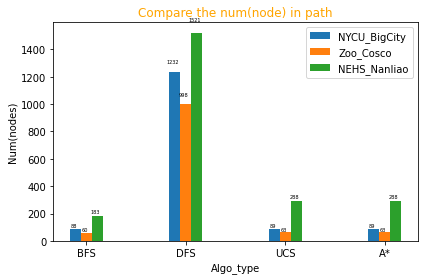

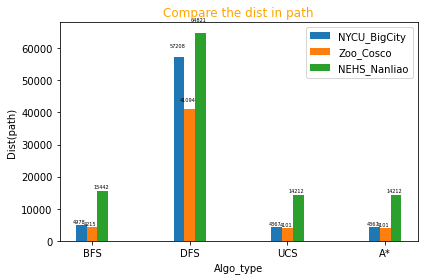

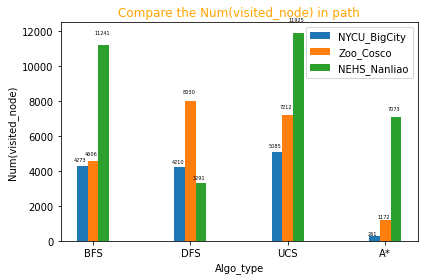

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/3, (1.05)*height,'%d' % int(height), ha='center', va='bottom',fontsize=5)

# read_data
labels = ['BFS', 'DFS', 'UCS', 'A*']
NYCU_BigCity = compare_path[0]
Zoo_Cosco = compare_path[1]
NEHS_Nanliao = compare_path[2]

# Configure the bars
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
width = 0.33
rects1 = ax.bar(x - width/3, NYCU_BigCity, width/3, label='NYCU_BigCity')
rects2 = ax.bar(x, Zoo_Cosco, width/3, label='Zoo_Cosco')
rects3 = ax.bar(x + width/3, NEHS_Nanliao, width/3, label='NEHS_Nanliao')

# Add text for labels, title and axis.
ax.set_title('Compare the num(node) in path', color='orange')
ax.set_ylabel('Num(nodes)')
ax.set_xlabel("Algo_type")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

#===========================================================================

# read_data
labels = ['BFS', 'DFS', 'UCS', 'A*']
NYCU_BigCity = compare_dist[0]
Zoo_Cosco = compare_dist[1]
NEHS_Nanliao = compare_dist[2]

# Configure the bars
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
width = 0.33
rects1 = ax.bar(x - width/3, NYCU_BigCity, width/3, label='NYCU_BigCity')
rects2 = ax.bar(x, Zoo_Cosco, width/3, label='Zoo_Cosco')
rects3 = ax.bar(x + width/3, NEHS_Nanliao, width/3, label='NEHS_Nanliao')

# Add text for labels, title and axis.
ax.set_title('Compare the dist in path', color='orange')
ax.set_ylabel('Dist(path)')
ax.set_xlabel("Algo_type")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

#===========================================================================
# read_data
labels = ['BFS', 'DFS', 'UCS', 'A*']
NYCU_BigCity = compare_visited[0]
Zoo_Cosco = compare_visited[1]
NEHS_Nanliao = compare_visited[2]

# Configure the bars
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
width = 0.33
rects1 = ax.bar(x - width/3, NYCU_BigCity, width/3, label='NYCU_BigCity')
rects2 = ax.bar(x, Zoo_Cosco, width/3, label='Zoo_Cosco')
rects3 = ax.bar(x + width/3, NEHS_Nanliao, width/3, label='NEHS_Nanliao')

# Add text for labels, title and axis.
ax.set_title('Compare the Num(visited_node) in path', color='orange')
ax.set_ylabel('Num(visited_node)')
ax.set_xlabel("Algo_type")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


## Part 6

In [14]:
# Part 6 (Bonus)
# Don't change this part.
# Show the shortest time result of A* search
start = 2270143902
end = 1079387396
h_type = 0
time_path, time, time_visited = g.astar_time(start, end, h_type)
print(f'The number of nodes in the path found by A* search: {len(time_path)}')
print(f'Total second of path found by A* search: {time} s')
print(f'The number of visited nodes in A* search: {time_visited}\n')

fmap = folium.Map(location=(24.806383132251874, 120.97685775516189), zoom_start=13)
for line in load_path_graph(time_path):
    fmap.add_child(folium.PolyLine(locations=line, tooltip='astar', weight=4, color='red'))
fmap

The number of nodes in the path found by A* search: 89
Total second of path found by A* search: 320.87823163083164 s
The number of visited nodes in A* search: 217



In [15]:
# Part 5
# Change start ID and end ID.
compare_path = defaultdict(list)
compare_dist = defaultdict(list)
compare_visited = defaultdict(list)

for place_op in [0,1,2]:
  if (place_op == 0 ):    # NYCU & Big City
    start = 2270143902
    end = 1079387396
    for algo_type in ['a','a_time']:
      (len_path, dist, visited_num) = get_result(place_op, algo_type)
      compare_path[place_op].append(len_path)
      compare_dist[place_op].append(dist)
      compare_visited[place_op].append(visited_num)

  elif (place_op == 1 ):  # Zoo & COSCO
    start = 426882161
    end = 1737223506
    for algo_type in ['a','a_time']:
      (len_path, dist, visited_num) = get_result(place_op, algo_type)
      compare_path[place_op].append(len_path)
      compare_dist[place_op].append(dist)
      compare_visited[place_op].append(visited_num)

  elif (place_op == 2 ):  # NEHS & Nanliao FP
    start = 1718165260
    end = 8513026827
    for algo_type in ['a','a_time']:
      (len_path, dist, visited_num) = get_result(place_op, algo_type)
      compare_path[place_op].append(len_path)
      compare_dist[place_op].append(dist)
      compare_visited[place_op].append(visited_num)

  else:
    print("invalid place_op")



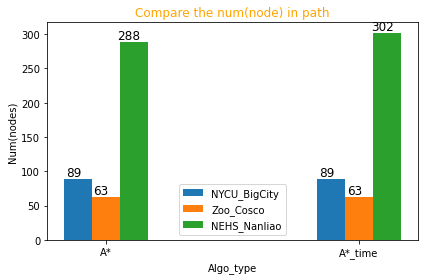

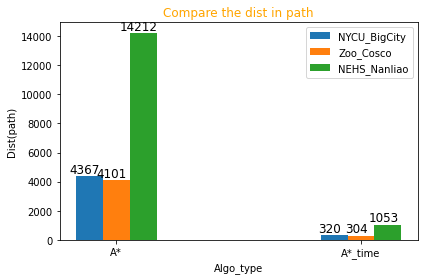

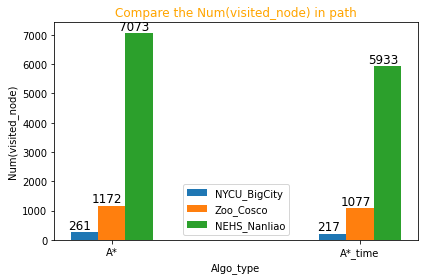

In [16]:

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/3, (1)*height,'%d' % int(height), ha='center', va='bottom',fontsize=12)

# read_data
labels = ['A*','A*_time']
NYCU_BigCity = compare_path[0]
Zoo_Cosco = compare_path[1]
NEHS_Nanliao = compare_path[2]

# Configure the bars
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
width = 0.33
rects1 = ax.bar(x - width/3, NYCU_BigCity, width/3, label='NYCU_BigCity')
rects2 = ax.bar(x, Zoo_Cosco, width/3, label='Zoo_Cosco')
rects3 = ax.bar(x + width/3, NEHS_Nanliao, width/3, label='NEHS_Nanliao')

# Add text for labels, title and axis.
ax.set_title('Compare the num(node) in path', color='orange')
ax.set_ylabel('Num(nodes)')
ax.set_xlabel("Algo_type")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

#===========================================================================

# read_data
labels = ['A*','A*_time']
NYCU_BigCity = compare_dist[0]
Zoo_Cosco = compare_dist[1]
NEHS_Nanliao = compare_dist[2]

# Configure the bars
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
width = 0.33
rects1 = ax.bar(x - width/3, NYCU_BigCity, width/3, label='NYCU_BigCity')
rects2 = ax.bar(x, Zoo_Cosco, width/3, label='Zoo_Cosco')
rects3 = ax.bar(x + width/3, NEHS_Nanliao, width/3, label='NEHS_Nanliao')

# Add text for labels, title and axis.
ax.set_title('Compare the dist in path', color='orange')
ax.set_ylabel('Dist(path)')
ax.set_xlabel("Algo_type")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

#===========================================================================
# read_data
labels = ['A*','A*_time']
NYCU_BigCity = compare_visited[0]
Zoo_Cosco = compare_visited[1]
NEHS_Nanliao = compare_visited[2]

# Configure the bars
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
width = 0.33
rects1 = ax.bar(x - width/3, NYCU_BigCity, width/3, label='NYCU_BigCity')
rects2 = ax.bar(x, Zoo_Cosco, width/3, label='Zoo_Cosco')
rects3 = ax.bar(x + width/3, NEHS_Nanliao, width/3, label='NEHS_Nanliao')

# Add text for labels, title and axis.
ax.set_title('Compare the Num(visited_node) in path', color='orange')
ax.set_ylabel('Num(visited_node)')
ax.set_xlabel("Algo_type")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


In [17]:
# For Google Colab
# Remember to execute this line once you've modified any .py file
# Save the .py code you have modified to your Google Drive
#!cp ./*.py ./gdrive/MyDrive/AI_HW2/